<a href="https://colab.research.google.com/github/tharusha20241825-afk/MLCW/blob/main/Tharusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [4]:
# LOAD DATA
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN")
print("=" * 60)

EXPLORATORY DATA ANALYSIS - TELCO CUSTOMER CHURN


In [5]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
df.info()


1. DATASET OVERVIEW
----------------------------------------
Shape: 7043 rows × 21 columns
Memory usage: 6.82 MB

First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4         

In [6]:
# 2. CHECK FOR MISSING VALUES AND DUPLICATES
print("\n\n2. DATA QUALITY CHECK")
print("-" * 40)

# Missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Check TotalCharges specifically (known issue - blank strings)
print("\nChecking 'TotalCharges' column:")
print(f"Data type: {df['TotalCharges'].dtype}")
print(f"Unique sample values: {df['TotalCharges'].unique()[:5]}")

# Find empty strings in TotalCharges
blank_totalcharges = df[df['TotalCharges'].str.strip() == ''].shape[0]
print(f"Rows with blank TotalCharges: {blank_totalcharges}")

# Convert TotalCharges to numeric, handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with median
median_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_charges)
print(f"Filled {df['TotalCharges'].isnull().sum()} missing values with median: {median_charges:.2f}")

# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Drop customerID (not useful for modeling)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
    print("Dropped 'customerID' column")



2. DATA QUALITY CHECK
----------------------------------------
Missing values per column:
No missing values found

Checking 'TotalCharges' column:
Data type: object
Unique sample values: ['29.85' '1889.5' '108.15' '1840.75' '151.65']
Rows with blank TotalCharges: 11
Filled 0 missing values with median: 1397.47

Duplicate rows: 0
Dropped 'customerID' column




3. TARGET VARIABLE: CHURN
----------------------------------------
Churn distribution:
  Not Churned (No): 5,174 customers (73.5%)
  Churned (Yes): 1,869 customers (26.5%)


/tmp/ipython-input-1797875510.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
/tmp/ipython-input-1797875510.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])


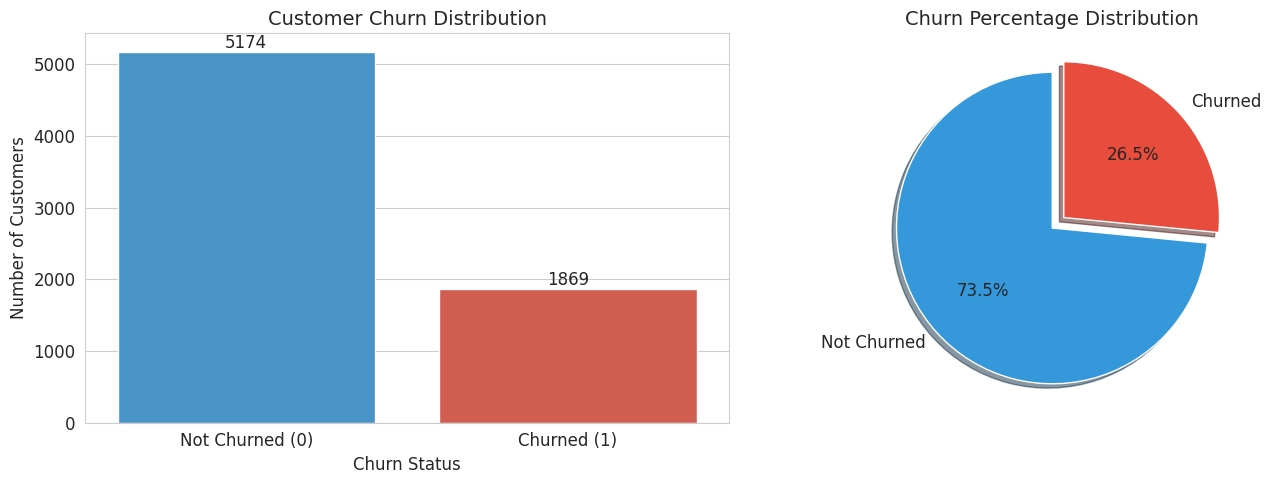

In [7]:
# 3. TARGET VARIABLE ANALYSIS
print("\n\n3. TARGET VARIABLE: CHURN")
print("-" * 40)

# Convert Churn to binary (1 for 'Yes', 0 for 'No')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Distribution
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn distribution:")
for i, (count, percent) in enumerate(zip(churn_counts, churn_percent)):
    label = "Churned (Yes)" if i == 1 else "Not Churned (No)"
    print(f"  {label}: {count:,} customers ({percent:.1f}%)")

# Visualize churn distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#3498db', '#e74c3c'])
axes[0].set_title('Customer Churn Distribution', fontsize=14)
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xticklabels(['Not Churned (0)', 'Churned (1)'])

# Add count labels on bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Pie chart
colors = ['#3498db', '#e74c3c']
axes[1].pie(churn_counts, labels=['Not Churned', 'Churned'],
            autopct='%1.1f%%', colors=colors, startangle=90,
            explode=(0, 0.1), shadow=True)
axes[1].set_title('Churn Percentage Distribution', fontsize=14)

plt.tight_layout()
plt.show()

In [8]:
# 4. FEATURE CATEGORIZATION
print("\n\n4. FEATURE ANALYSIS")
print("-" * 40)

# Identify column types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical (it's our target)
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

print(f"Numerical features ({len(numerical_cols)}):")
print(f"  {', '.join(numerical_cols)}")

print(f"\nCategorical features ({len(categorical_cols)}):")
print(f"  {', '.join(categorical_cols)}")



4. FEATURE ANALYSIS
----------------------------------------
Numerical features (4):
  SeniorCitizen, tenure, MonthlyCharges, TotalCharges

Categorical features (15):
  gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod
